<a href="https://colab.research.google.com/github/zainali60/CNN-MNIST/blob/main/MNIST_for_multi_class_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
from tensorflow.keras.datasets.mnist import load_data

(X_train, y_train) , (X_test, y_test) = load_data()

11493376/11490434 [==============================] - 0s 0us/step


**Basic EDA**

In [3]:
print("There are ", len(X_train), "images in the training dataset") 
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [4]:
X_train[0].shape

(28, 28)

In [5]:
X_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

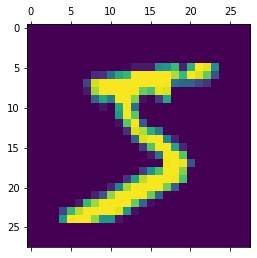

In [6]:
plt.matshow(X_train[0])

In [7]:
# we can use y_train to cross check
y_train[0]

5

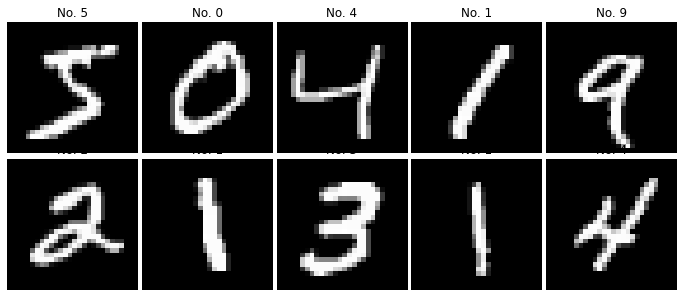

In [9]:
# code to view the images
num_rows, num_cols = 2, 5
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),
gridspec_kw={'wspace':0.03, 'hspace':0.01},
squeeze=True)

for r in range(num_rows):
  for c in range(num_cols):

    image_index = r * 5 + c
    ax[r,c].axis("off")
    ax[r,c].imshow( X_train[image_index], cmap='gray')
    ax[r,c].set_title('No. %d' % y_train[image_index])
plt.show()
plt.close()

**Data Preprocessing
**

In [10]:
X_train = X_train / 255
X_test = X_test / 255

"""
Why divided by 255?
The pixel value lie in the range 0 - 255 representing the RGB (Red Green Blue) value. """

'\nWhy divided by 255?\nThe pixel value lie in the range 0 - 255 representing the RGB (Red Green Blue) value. '

In [11]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
X_train_flattened = X_train.reshape(len(X_train), 28*28) # converting our 2D array representin an image to one dimensional
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [14]:
X_train_flattened.shape


(60000, 784)

**Define the model**

In [17]:
# Defining the Model
model = tf.keras.Sequential([
tf.keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')]) # The input shape is 784.

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [20]:
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4684 - accuracy: 0.8776
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3030 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2834 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2734 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2666 - accuracy: 0.9256


In [21]:
model.evaluate(X_test_flattened, y_test)


313/313 [==============================] - 0s 1ms/step - loss: 0.2669 - accuracy: 0.9267


[0.26688385009765625, 0.9266999959945679]

**predict for the X_test**

In [22]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([3.3805221e-02, 3.4737204e-07, 8.0088347e-02, 9.5732480e-01,
       2.7228594e-03, 1.2800032e-01, 2.5765346e-06, 9.9982071e-01,
       1.1313188e-01, 6.0155171e-01], dtype=float32)

In [23]:
np.argmax(y_predicted[0])

7

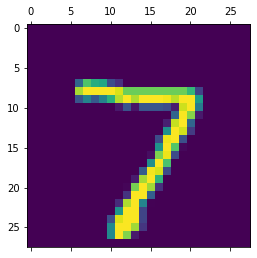

In [24]:
plt.matshow(X_test[0])

In [26]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [27]:
con_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
con_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    2,    0,    5,    9,    2,    1,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   4,    7,  945,   12,    8,    4,   13,    9,   26,    4],
       [   3,    0,   26,  917,    0,   23,    3,   11,   20,    7],
       [   1,    2,    2,    1,  923,    0,   14,    3,    8,   28],
       [   9,    3,    3,   34,   12,  770,   18,    7,   31,    5],
       [   9,    3,    6,    1,    7,    9,  920,    2,    1,    0],
       [   1,    5,   27,    3,    9,    0,    0,  957,    2,   24],
       [   8,   10,   11,   21,   10,   30,   11,   13,  855,    5],
       [  11,    7,    1,   10,   37,    7,    0,   28,    5,  903]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

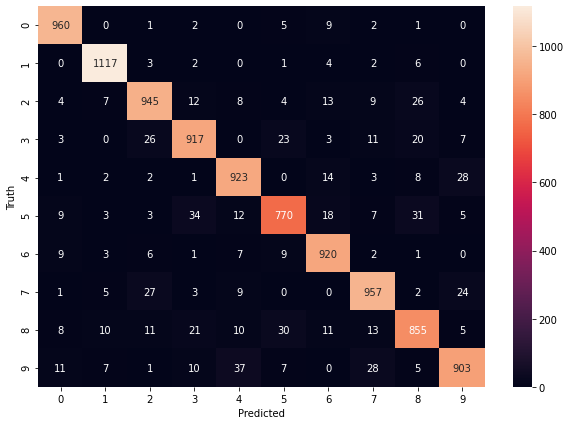

In [28]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(con_matrix,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Building Neural Network Model Using hidden layer**

In [29]:
# Defining the model
model = tf.keras.Sequential([
tf.keras.layers.Dense(100, input_shape=(784,), activation='relu'),
tf.keras.layers.Dense(100, input_shape=(100,),activation='relu'),
tf.keras.layers.Dense(10, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Compiling the model
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

# Fit the model
model.fit(X_train_flattened, y_train, batch_size= 128,epochs=5)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.3431 - accuracy: 0.9017
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1449 - accuracy: 0.9570
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1009 - accuracy: 0.9698
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0770 - accuracy: 0.9769
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0614 - accuracy: 0.9816


In [31]:
model.evaluate(X_test_flattened,y_test)


313/313 [==============================] - 1s 1ms/step - loss: 0.0790 - accuracy: 0.9752


[0.07895506173372269, 0.9751999974250793]

Text(69.0, 0.5, 'Truth')

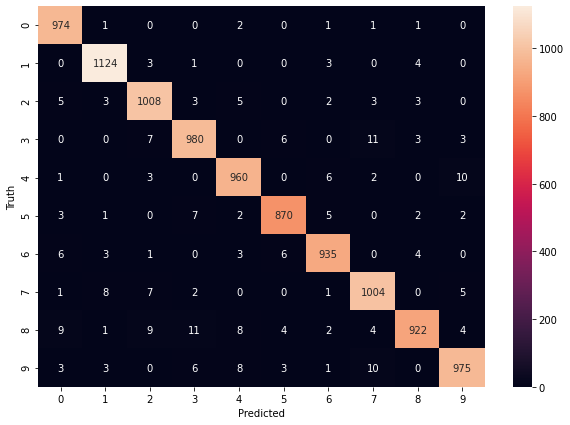

In [32]:
y_predicted  = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
con_matrix = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
plt.figure(figsize=(10,7))
sn.heatmap(con_matrix,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')